<a href="https://colab.research.google.com/github/ThamirisNeves/Mestrado_EEG/blob/main/AMUSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AMUSE


In [ ]:
## =========== Joint Diagonalization based on SOS ========== ##


## Libraries =============================================== ##

import numpy as np
import random as rd
from scipy.signal import lfilter
import matplotlib.pyplot as plt
from scipy import linalg

## ========================================================= ##


## Set Parameters ========================================== ##

np.random.seed(0)

# Number of Samples:
n_samples = 1000

# Temporal Correlation Filters:
temporal_cor1 = [1, 0.6, -0.2, 0.1]
temporal_cor2 = [1, -0.4, 0.3, 0.2]

print('Temporal 1: ',temporal_cor1)
print('Temporal 2: ',temporal_cor2)

# Mixing Matrix:
A = np.matrix('0.8, -0.2; 0.4, 0.7')
print('Matriz de mistura: \n', A)

## ========================================================= ##


## Source Generation ======================================= ##

# Gaussian Source:
u1 = np.random.normal(0, 1, n_samples)
#print('u1:',u1)

# Uniform Source:
u2 = np.random.uniform(-1, 1, n_samples)
#print('u2:',u2)

# Add Temporal Correlation:
s1 = lfilter(temporal_cor1, 1, u1)
s2 = lfilter(temporal_cor2, 1, u2)

#print('s1:',s1)
#print('s2:',s2)

# Combine Sources into a Single Variable:
S = np.c_[s1, s2]
print('S:', S)

# Add noise
#S += 0.2 * np.random.normal(size=S.shape)
# Standardize data
#S /= S.std(axis=0)

## ========================================================= ##

## Mixing Process ========================================== ##

# Generate Observations:
#X são os dados observados
X = np.dot(A,S.T)
print('X:',X)
print('X.shape:',X.shape)
X_T = X.T
print('Média: ',np.mean(X))

Temporal 1:  [1, 0.6, -0.2, 0.1]
Temporal 2:  [1, -0.4, 0.3, 0.2]
Matriz de mistura: 
 [[ 0.8 -0.2]
 [ 0.4  0.7]]
S: [[ 1.76405235  0.64380782]
 [ 1.45858862  0.14353412]
 [ 0.86602184  0.79887464]
 ...
 [-0.07850915  0.73571049]
 [-1.0101287  -0.0632805 ]
 [-1.08535899 -0.6216093 ]]
X: [[ 1.28248031  1.13816407  0.53304254 ... -0.20994942 -0.79544686
  -0.74396533]
 [ 1.15628641  0.68390933  0.90562098 ...  0.48359368 -0.44834783
  -0.86927011]]
X.shape: (2, 1000)
Média:  -0.033650950400935


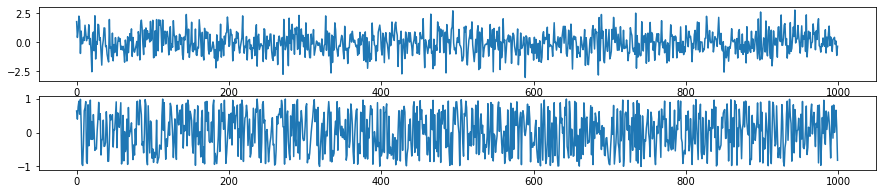

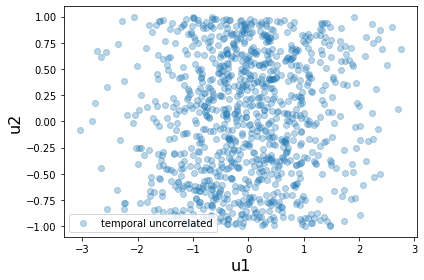

In [ ]:
fig,ax = plt.subplots(2,1,figsize=(15,3))
ax[0].plot(u1)
ax[1].plot(u2)
plt.show()

plt.scatter(u1, u2, label='temporal uncorrelated', alpha=0.3)

plt.xlabel('u1', fontsize=16)
plt.ylabel('u2', fontsize=16)
plt.legend()

plt.tight_layout()
plt.savefig('whiten_5.png', dpi=300)

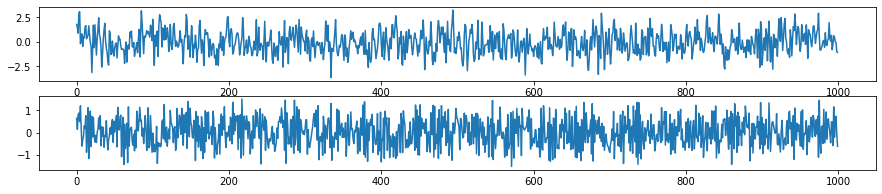

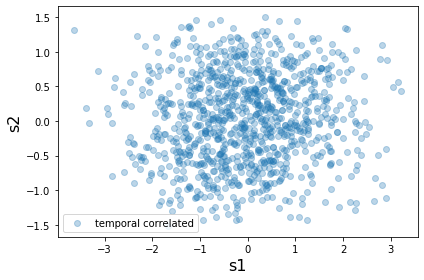

In [ ]:
fig,ax = plt.subplots(2,1,figsize=(15,3))
ax[0].plot(s1)
ax[1].plot(s2)
plt.show()

plt.scatter(s1, s2, label='temporal correlated', alpha=0.3)

plt.xlabel('s1', fontsize=16)
plt.ylabel('s2', fontsize=16)
plt.legend()

plt.tight_layout()
#plt.savefig('whiten_5.png', dpi=300)

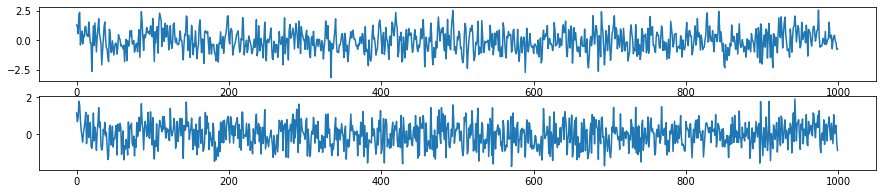

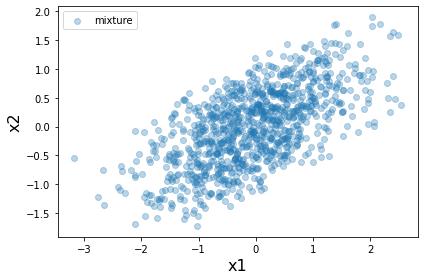

In [ ]:
fig,ax = plt.subplots(2,1,figsize=(15,3))
ax[0].plot(X_T[:,0])
ax[1].plot(X_T[:,1])
plt.show()

plt.scatter(X_T[:,0].reshape(-1).tolist(), X_T[:,1].reshape(-1).tolist(), label='mixture', alpha=0.3)

plt.xlabel('x1', fontsize=16)
plt.ylabel('x2', fontsize=16)
plt.legend()

plt.tight_layout()

(1000, 2)
xc.shape: (2, 1000)
Média: -2.6645352591003758e-18 

Covariance matrix:
 [[0.86887584 0.39675283]
 [0.39675283 0.44804111]] 

Eigenvalues:
 [1.10755565 0.2093613 ] 

Eigenvectors:
 [[ 0.85689385 -0.5154929 ]
 [ 0.5154929   0.85689385]] 

Diagonal matrix for inverse square root of Eigenvalues:
 [[1.10755565 0.        ]
 [0.         0.2093613 ]] 

Eigenvalue matrix EE^T = I :
 [[ 1.00000000e+00 -1.98117521e-17]
 [-1.98117521e-17  1.00000000e+00]] 

Covariance matriz of whitening data:
 [[1.00000000e+00 1.21680443e-16]
 [1.21680443e-16 1.00000000e+00]] 



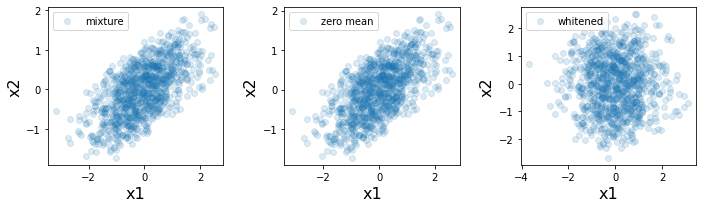

In [ ]:
## WHITENING ========================================= ##

# Zero center data
XC = X_T - np.mean(X_T, axis=0)
print(XC.shape)
XC = XC.T
print('xc.shape:', XC.shape)
print('Média:',np.mean(XC),'\n')

# Calculate Covariance matrix
# Note: 'rowvar=True' because each row is considered as a feature
# Note: 'bias=True' to divide the sum of squared variances by 'n' instead of 'n-1'
xcov = np.cov(XC, rowvar=True, bias=True)
print('Covariance matrix:\n',xcov,'\n')

# Calculate Eigenvalues and Eigenvectors
w, e = linalg.eig(xcov) # .eigh()
# Note: Use w.real.round(4) to (1) remove 'j' notation to real, (2) round to '4' significant digits
print("Eigenvalues:\n", w.real, '\n')#.real.round(4), '\n')
print("Eigenvectors:\n", e, '\n')

# Calculate inverse square root of Eigenvalues
# Optional: Add '.1e5' to avoid division errors if needed
# Create a diagonal matrix
diagw = np.diag(w) # or np.diag(1/((w+.1e-5)**0.5))
diagw = diagw.real #convert to real and round off
print("Diagonal matrix for inverse square root of Eigenvalues:\n", diagw, '\n')

#Eigenvalue matriz: EE^T = I
print("Eigenvalue matrix EE^T = I :\n", np.dot(e,e.T), '\n')

#Calculate whitening
V = np.dot(e,np.dot(np.diag(1/(w.real**0.5)),e.T))

Xwhite = np.dot(V,XC)

cov_Xwhite = np.cov(Xwhite, rowvar=True, bias=True)
print("Covariance matriz of whitening data:\n", cov_Xwhite, '\n')


## PLOTING ========================================= ##

fig = plt.figure(figsize=(10,3))

plt.subplot(1,3,1)
plt.scatter(X_T[:,0].reshape(-1).tolist(), X_T[:,1].reshape(-1).tolist(), label='mixture', alpha=0.15)
plt.xlabel('x1', fontsize=16)
plt.ylabel('x2', fontsize=16)
plt.legend()

plt.subplot(1,3,2)
plt.scatter(XC[0,:].reshape(-1).tolist(), XC[1,:].reshape(-1).tolist(), label='zero mean', alpha=0.15)
plt.xlabel('x1', fontsize=16)
plt.ylabel('x2', fontsize=16)
plt.legend()

plt.subplot(1,3,3)
plt.scatter(Xwhite[0,:].reshape(-1).tolist(), Xwhite[1,:].reshape(-1).tolist(), label='whitened', alpha=0.15)
plt.xlabel('x1', fontsize=16)
plt.ylabel('x2', fontsize=16)
plt.legend()


plt.tight_layout()
plt.savefig('whiten_2.png', dpi=300)

## ========================================================= ##

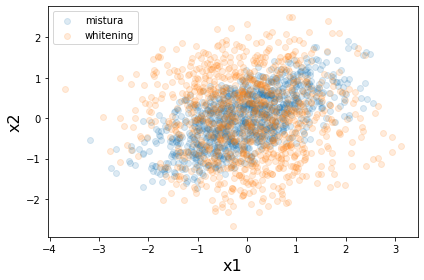

In [ ]:
# Overlay plot
plt.scatter(X_T[:,0].reshape(-1).tolist(), X_T[:,1].reshape(-1).tolist(), label='mistura', alpha=0.15)
plt.scatter(Xwhite[0,:].reshape(-1).tolist(), Xwhite[1,:].reshape(-1).tolist(), label='whitening', alpha=0.15)

plt.xlabel('x1', fontsize=16)
plt.ylabel('x2', fontsize=16)
plt.legend()

plt.tight_layout()
plt.savefig('whiten_3.png', dpi=300)

In [ ]:
## TIME LAG ========================================= ##

#atraso do tempo
tau = 0

#matriz branqueada com valores sem lag ajustadas para o mesmo tamanho da matriz com lag
X_nolag = Xwhite[:,tau:]
#matriz branqueada com valores com lag ajustadas para o mesmo tamanho da matriz com lag
X_lag = Xwhite[:,:-tau] if tau != 0 else Xwhite[:,:]


In [ ]:
X_lag.shape

(2, 1000)

In [ ]:
#Matriz de Covariância da
C_z_tau = (1/(Xwhite.shape[1] - tau))*(np.dot(X_nolag,X_lag.T) + (np.dot(X_lag,X_nolag.T)))

In [ ]:
C_z_tau

matrix([[2.0000000e+00, 2.3625546e-16],
        [2.3625546e-16, 2.0000000e+00]])

In [ ]:
#Autovalores e autovetores da matriz de coveriância usando time lag
w1, e1 = linalg.eig(C_z_tau) # .eigh()

print("Eigenvalues:\n", w1.real, '\n')#.real.round(4), '\n')
print("Eigenvectors:\n", e1, '\n')

Eigenvalues:
 [2. 2.] 

Eigenvectors:
 [[ 1.         -0.17460911]
 [ 0.          0.98463783]] 



In [ ]:
#As linhas da matriz de separação W são dadas pelos autovetores
W = e1.T
print(W)

[[ 1.          0.        ]
 [-0.17460911  0.98463783]]


In [ ]:
X_RES = np.dot(W,Xwhite)

In [ ]:
X_RES

matrix([[ 1.08121101,  1.15446511,  0.25985938, ..., -0.45974617,
         -0.6997607 , -0.40426288],
        [ 1.2180282 ,  0.4189328 ,  1.30570449, ...,  1.05877998,
         -0.28899087, -1.1379937 ]])

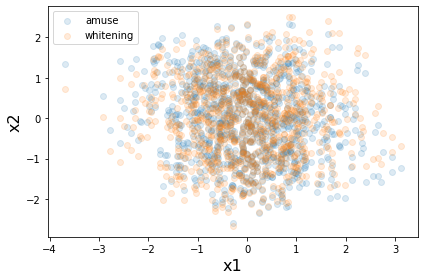

In [ ]:
# Overlay plot
plt.scatter(X_RES[0,:].reshape(-1).tolist(), X_RES[1,:].reshape(-1).tolist(), label='amuse', alpha=0.15)
plt.scatter(Xwhite[0,:].reshape(-1).tolist(), Xwhite[1,:].reshape(-1).tolist(), label='whitening', alpha=0.15)

plt.xlabel('x1', fontsize=16)
plt.ylabel('x2', fontsize=16)
plt.legend()

plt.tight_layout()
plt.savefig('whiten_6.png', dpi=300)

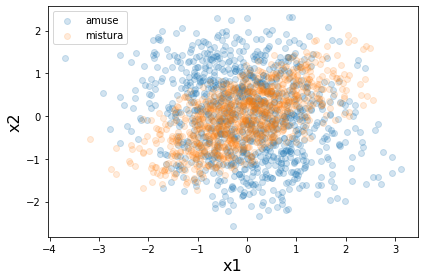

In [ ]:
# Overlay plot
plt.scatter(X_RES[0,:].reshape(-1).tolist(), X_RES[1,:].reshape(-1).tolist(), label='amuse', alpha=0.2)
plt.scatter(X[0,:].reshape(-1).tolist(), X[1,:].reshape(-1).tolist(), label='mistura', alpha=0.15)

plt.xlabel('x1', fontsize=16)
plt.ylabel('x2', fontsize=16)
plt.legend()

plt.tight_layout()
#plt.savefig('whiten_6.png', dpi=300)

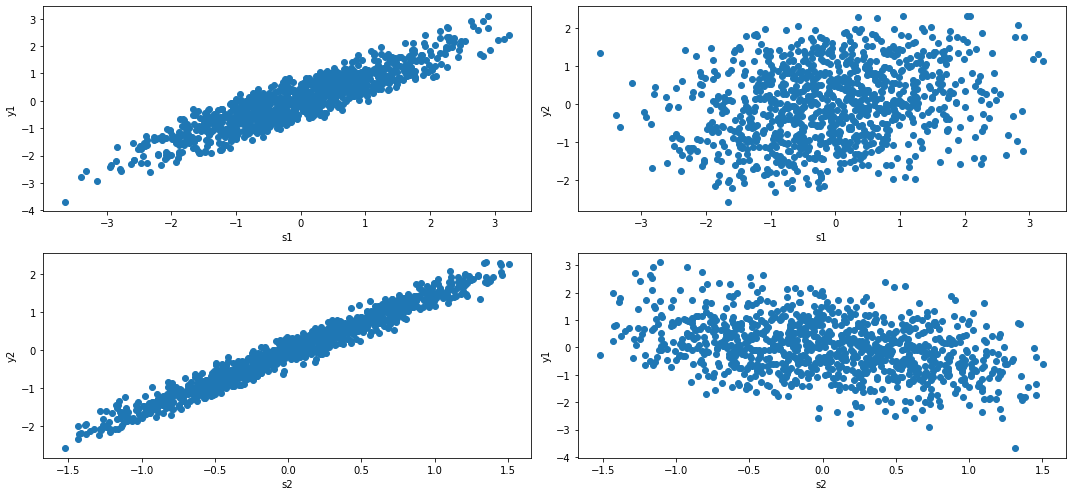

In [ ]:
y1 = X_RES[0,:].reshape(-1).tolist()
y2 = X_RES[1,:].reshape(-1).tolist()

fig,ax = plt.subplots(2,2,figsize=(15,7))

ax[0][0].scatter(s1,y1)
ax[0][0].set_xlabel('s1')
ax[0][0].set_ylabel('y1')

ax[1][0].scatter(s2,y2)
ax[1][0].set_xlabel('s2')
ax[1][0].set_ylabel('y2')

ax[1][1].scatter(s2,y1)
ax[1][1].set_xlabel('s2')
ax[1][1].set_ylabel('y1')

ax[0][1].scatter(s1,y2)
ax[0][1].set_xlabel('s1')
ax[0][1].set_ylabel('y2')

plt.tight_layout()
plt.show()

# AMUSE (função parametrizada em tau)


In [ ]:
## ========================================================= ##


## Set Parameters ========================================== ##

np.random.seed(0)

# Number of Samples:
n_samples = 1000

# Temporal Correlation Filters:
temporal_cor1 = [1, 0.6, -0.2, 0.1]
temporal_cor2 = [1, -0.4, 0.3, 0.2]

print('Temporal 1: ',temporal_cor1)
print('Temporal 2: ',temporal_cor2)

# Mixing Matrix:
A = np.matrix('0.8, -0.2; 0.4, 0.7')
print('Matriz de mistura: \n', A)

## ========================================================= ##


## Source Generation ======================================= ##

# Gaussian Source:
u1 = np.random.normal(0, 1, n_samples)
#print('u1:',u1)

# Uniform Source:
u2 = np.random.uniform(-1, 1, n_samples)
#print('u2:',u2)

# Add Temporal Correlation:
s1 = lfilter(temporal_cor1, 1, u1)
s2 = lfilter(temporal_cor2, 1, u2)

#print('s1:',s1)
#print('s2:',s2)

# Combine Sources into a Single Variable:
S = np.c_[s1, s2]
print('S:', S)

# Add noise
#S += 0.2 * np.random.normal(size=S.shape)
# Standardize data
#S /= S.std(axis=0)

## ========================================================= ##

## Mixing Process ========================================== ##

# Generate Observations:
#X são os dados observados
X = np.dot(A,S.T)
print('X:',X)
print('X.shape:',X.shape)

Temporal 1:  [1, 0.6, -0.2, 0.1]
Temporal 2:  [1, -0.4, 0.3, 0.2]
Matriz de mistura: 
 [[ 0.8 -0.2]
 [ 0.4  0.7]]
S: [[ 1.76405235  0.64380782]
 [ 1.45858862  0.14353412]
 [ 0.86602184  0.79887464]
 ...
 [-0.07850915  0.73571049]
 [-1.0101287  -0.0632805 ]
 [-1.08535899 -0.6216093 ]]
X: [[ 1.28248031  1.13816407  0.53304254 ... -0.20994942 -0.79544686
  -0.74396533]
 [ 1.15628641  0.68390933  0.90562098 ...  0.48359368 -0.44834783
  -0.86927011]]
X.shape: (2, 1000)


In [ ]:
def AMUSE(X, tau):
  #----------------Whitening data----------------------------------#
  X_T = X.T
  XC = X_T - np.mean(X_T, axis=0)

  XC = XC.T

  # Calculate Covariance matrix
  # Note: 'rowvar=True' because each row is considered as a feature
  # Note: 'bias=True' to divide the sum of squared variances by 'n' instead of 'n-1'
  xcov = np.cov(XC, rowvar=True, bias=True)

  # Calculate Eigenvalues and Eigenvectors
  w, e = linalg.eig(xcov) # .eigh()

  # Calculate inverse square root of Eigenvalues
  # Optional: Add '.1e5' to avoid division errors if needed
  # Create a diagonal matrix
  diagw = np.diag(w) # or np.diag(1/((w+.1e-5)**0.5))
  diagw = diagw.real #convert to real and round off

  #Calculate whitening
  V = np.dot(e,np.dot(np.diag(1/(w.real**0.5)),e.T))

  Xwhite = np.dot(V,XC)

  #--------------------------------------------------------------#

  #TIME LAG -----------------------------------------------------#
  #matriz branqueada com valores sem lag ajustadas para o mesmo tamanho da matriz com lag
  X_nolag = Xwhite[:,tau:]
  #matriz branqueada com valores com lag ajustadas para o mesmo tamanho da matriz com lag
  X_lag = Xwhite[:,:-tau]

  #Matriz de Covariância da
  C_z_tau = (1/(Xwhite.shape[1] - tau))*(np.dot(X_nolag,X_lag.T) + (np.dot(X_lag,X_nolag.T)))

  #Autovalores e autovetores da matriz de coveriância usando time lag
  w1, e1 = linalg.eig(C_z_tau) # .eigh()

  #As linhas da matriz de separação W são dadas pelos autovetores
  W = e1.T

  #X_RES é o X resultante da multiplicação do x branqueado e a matriz de separação
  X_RES = np.dot(W,Xwhite)

  return  W, X_RES, Xwhite

In [ ]:
W_matriz, X_final, X_white = AMUSE(X,1)

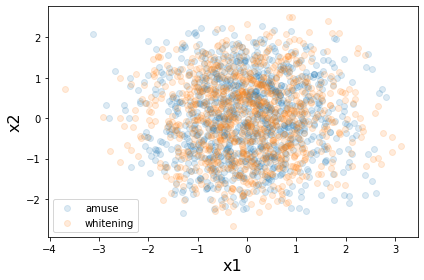

In [ ]:
# Overlay plot
plt.scatter(X_final[0,:].reshape(-1).tolist(), X_final[1,:].reshape(-1).tolist(), label='amuse', alpha=0.15)
plt.scatter(X_white[0,:].reshape(-1).tolist(), X_white[1,:].reshape(-1).tolist(), label='whitening', alpha=0.15)

plt.xlabel('x1', fontsize=16)
plt.ylabel('x2', fontsize=16)
plt.legend()

plt.tight_layout()
#plt.savefig('whiten_6.png', dpi=300)

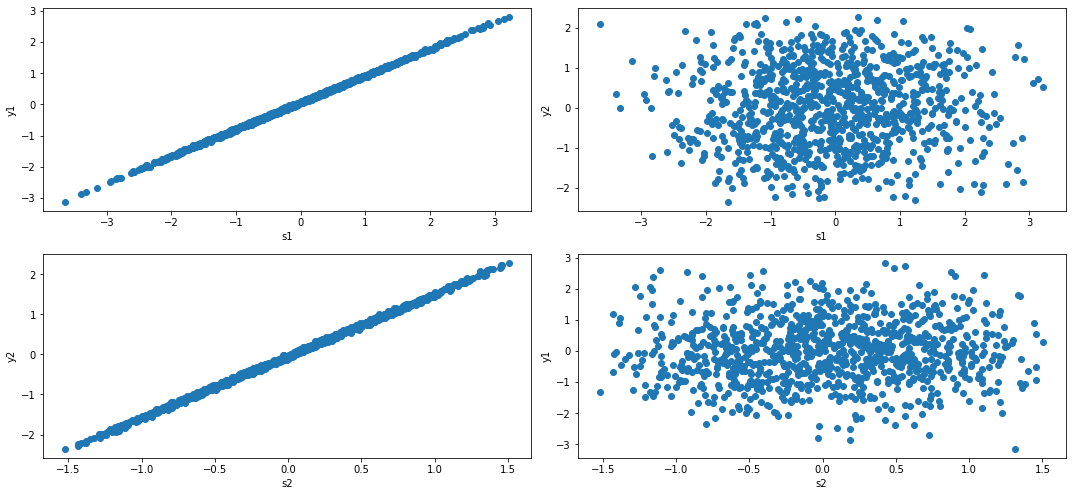

In [ ]:
y1 = X_final[0,:].reshape(-1).tolist()
y2 = X_final[1,:].reshape(-1).tolist()

fig,ax = plt.subplots(2,2,figsize=(15,7))

ax[0][0].scatter(s1,y1)
ax[0][0].set_xlabel('s1')
ax[0][0].set_ylabel('y1')

ax[1][0].scatter(s2,y2)
ax[1][0].set_xlabel('s2')
ax[1][0].set_ylabel('y2')

ax[1][1].scatter(s2,y1)
ax[1][1].set_xlabel('s2')
ax[1][1].set_ylabel('y1')

ax[0][1].scatter(s1,y2)
ax[0][1].set_xlabel('s1')
ax[0][1].set_ylabel('y2')

plt.tight_layout()
plt.show()

#Comparação com FastICA

Teste com o X sem o processo de branqueamento

In [ ]:
from sklearn.decomposition import FastICA, PCA

# Compute ICA
X_ica = np.array(X.T)
ica = FastICA(n_components=2)
S_ = ica.fit_transform(X_ica)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

# We can `prove` that the ICA model applies by reverting the unmixing.
#assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

# For comparison, compute PCA
pca = PCA(n_components=2)
H = pca.fit_transform(X_ica)  # Reconstruct signals based on orthogonal components

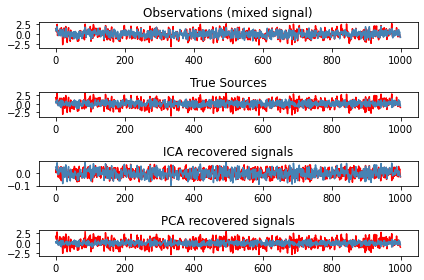

In [ ]:
import matplotlib.pyplot as plt

plt.figure()

models = [X_ica, S, S_, H]
names = [
    "Observations (mixed signal)",
    "True Sources",
    "ICA recovered signals",
    "PCA recovered signals",
]
colors = ["red", "steelblue", "orange"]

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()


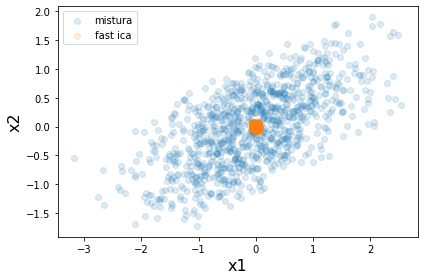

In [ ]:
# Overlay plot
plt.scatter(X_ica[:,0], X_ica[:,1], label='mistura', alpha=0.15)
plt.scatter(S_.T[0], S_.T[1], label='fast ica', alpha=0.15)

plt.xlabel('x1', fontsize=16)
plt.ylabel('x2', fontsize=16)
plt.legend()

plt.tight_layout()
plt.savefig('whiten_6.png', dpi=300)

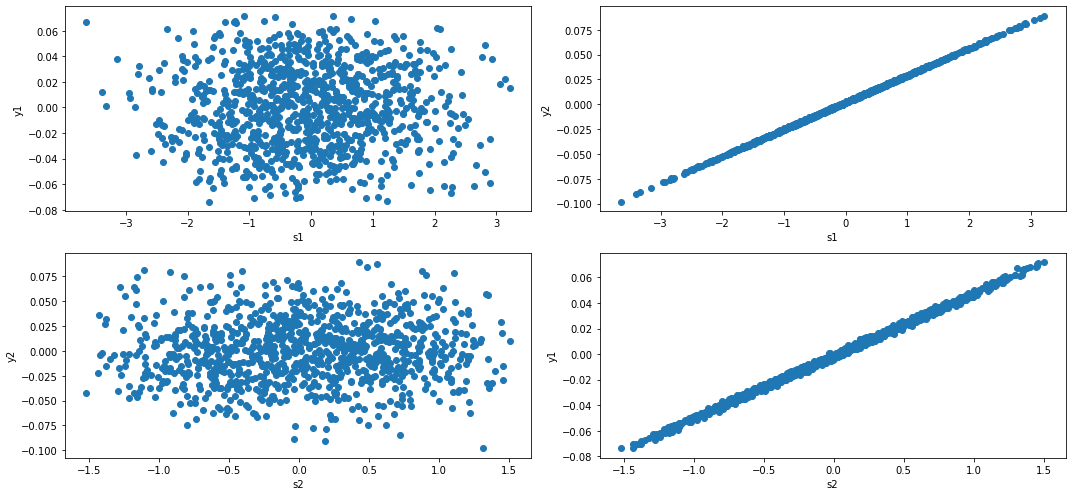

In [ ]:
y1 = S_.T[0]
y2 = S_.T[1]

fig,ax = plt.subplots(2,2,figsize=(15,7))

ax[0][0].scatter(s1,y1)
ax[0][0].set_xlabel('s1')
ax[0][0].set_ylabel('y1')

ax[1][0].scatter(s2,y2)
ax[1][0].set_xlabel('s2')
ax[1][0].set_ylabel('y2')

ax[1][1].scatter(s2,y1)
ax[1][1].set_xlabel('s2')
ax[1][1].set_ylabel('y1')

ax[0][1].scatter(s1,y2)
ax[0][1].set_xlabel('s1')
ax[0][1].set_ylabel('y2')

plt.tight_layout()
plt.show()

X com o processo de branqueamento


In [ ]:
# Compute ICA
X_ica2 = np.array(Xwhite.T)
ica = FastICA(n_components=2)
S2_ = ica.fit_transform(X_ica2)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

# We can `prove` that the ICA model applies by reverting the unmixing.
#assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

# For comparison, compute PCA
pca = PCA(n_components=2)
H = pca.fit_transform(X_ica2)  # Reconstruct signals based on orthogonal components

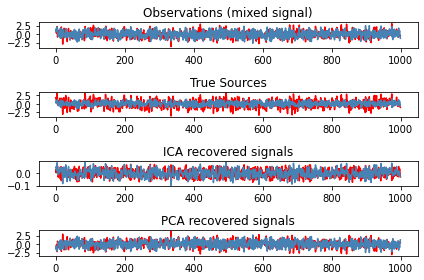

In [ ]:
import matplotlib.pyplot as plt

plt.figure()

models = [X_ica2, S, S2_, H]
names = [
    "Observations (mixed signal)",
    "True Sources",
    "ICA recovered signals",
    "PCA recovered signals",
]
colors = ["red", "steelblue", "orange"]

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()

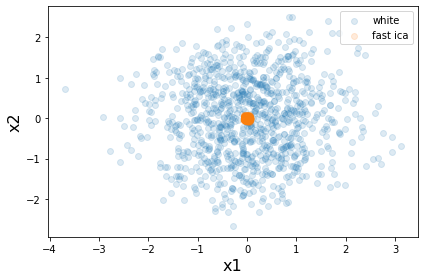

In [ ]:
# Overlay plot
plt.scatter(X_ica2[:,0], X_ica2[:,1], label='white', alpha=0.15)
plt.scatter(S2_.T[0], S2_.T[1], label='fast ica', alpha=0.15)

plt.xlabel('x1', fontsize=16)
plt.ylabel('x2', fontsize=16)
plt.legend()

plt.tight_layout()
plt.savefig('whiten_6.png', dpi=300)

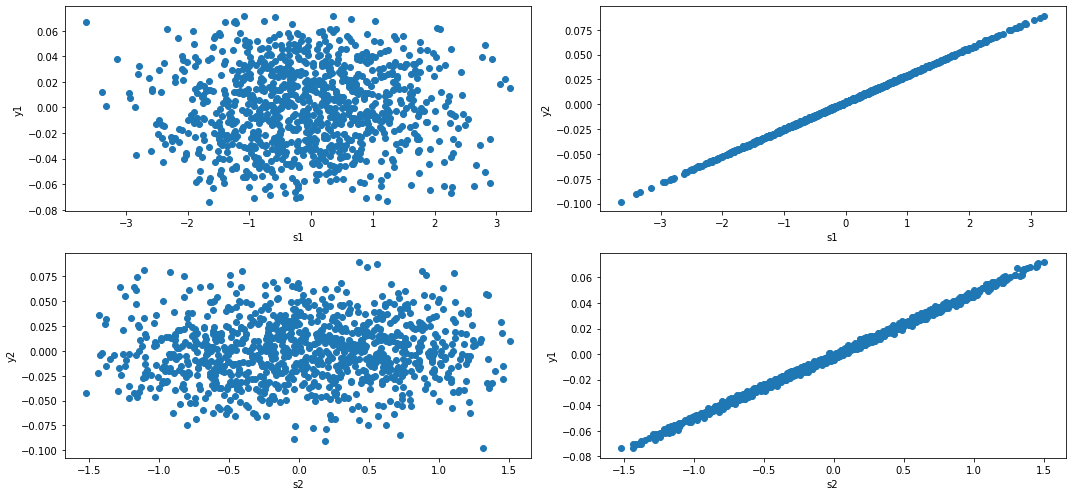

In [ ]:
y1 = S2_.T[0]
y2 = S2_.T[1]

fig,ax = plt.subplots(2,2,figsize=(15,7))

ax[0][0].scatter(s1,y1)
ax[0][0].set_xlabel('s1')
ax[0][0].set_ylabel('y1')

ax[1][0].scatter(s2,y2)
ax[1][0].set_xlabel('s2')
ax[1][0].set_ylabel('y2')

ax[1][1].scatter(s2,y1)
ax[1][1].set_xlabel('s2')
ax[1][1].set_ylabel('y1')

ax[0][1].scatter(s1,y2)
ax[0][1].set_xlabel('s1')
ax[0][1].set_ylabel('y2')

plt.tight_layout()
plt.show()

# SOBI

In [ ]:
import numpy as np
import itertools
import random

def time_lagged_cov(X, num_lags):

    N = X.shape[0]
    L = X.shape[1] - num_lags
    R = np.empty([num_lags,N,N])

    center = lambda x: x-x.mean(1)[:,None]

    X0 = center(X[:, 0:(0+L)])

    for k in range(num_lags):
        Xk = center(X[:,k:(k+L)])
        R[k] = (1.0/L)*(X0.dot(Xk.T))
        R[k] = 0.5*(R[k] + R[k].T)

    print('\n Time lagged conv: R =', R,  '\n')
    return R


def prewhiten(X):

    # subtract mean
    Xw = X - X.mean(1)[:, None]

    # Compute SVD
    U,s,V = np.linalg.svd(Xw, full_matrices=False)
    Sinv = np.linalg.pinv(np.diag(s))

    # Find principal components
    Q  = np.dot(Sinv, U.T)
    Xw = Q.dot(X)

    print('\n Pre whiten: \n Q= ', Q, '\n Xw=', Xw)
    print('\nTamanho Xw:', np.shape(Xw), '\n')
    return Q, Xw


def submat_mul(X, i, j, R, multype='post'):

    if multype.lower() == 'post':
        idx_i = (..., i)
        idx_j = (..., j)
    elif multype.lower() == 'pre':
        idx_i = (..., i, slice(None))
        idx_j = (..., j, slice(None))

     # In place multiplication X*R
    col_i = X[idx_i]*1.0
    col_j = X[idx_j]*1.0
    X[idx_i] = R[0,0]*col_i + R[0,1]*col_j
    X[idx_j] = R[1,0]*col_i + R[1,1]*col_j

    print('\nSubmat_mul: X = ', X, '\n')
    return X

def max_eigvec(A):
    # Find eigenvector associated with largest eigenvalue
    [eigvals,v] = np.linalg.eigh(A)
    v = v[:,-1]
    print('\nMax Eigen vector:', v, '\n')
    return v

def generate_index_pairs(idx_range, random_order=True):
    ij_pairs = itertools.combinations(idx_range, 2)
    ij_pairs = list(ij_pairs)
    if random_order:
        random.shuffle(ij_pairs)

    return ij_pairs

def off(X):
    off_ = 0
    for x in X:
        off_ += (np.linalg.norm(x,ord='fro')**2 - np.linalg.norm(np.diag(x))**2)

    return off_/np.max(X)

def jd(X, eps=1.0e-6, random_order = True):

    """jointly diagonalize several matrices.
    Performs jacobi-like procedure to approximately diagonalize
    a set of matrices X
    Parameters
    ----------
    X : np.ndarray
        Has dimensions [num_matrices, num_rows, num_cols]
    eps : scalar, optional
        Stopping criterion based on eps tolerance, should be between 0 and infinity
    random_order : bool, optional
        If True, pivots will cycle randomly for givens rotations.
        May affect convergence rate but not the final soltuion
    Returns
    -------
    V : np.ndarray
        2D array containing diagonalizing transformation
        i.e. (V.T).dot( X ).dot( V ) will be approximately diagonal

    """

    X = np.atleast_3d(X)
    V = np.eye(X.shape[1])

    keep_going = True
    counter = 0
    off_val = []
    while keep_going:
        print('{}: {}'.format(counter, off(X)))
        counter += 1
        keep_going = False

        ij_pairs = generate_index_pairs(range(X.shape[1]),
                                        random_order = random_order)

        for (i,j) in ij_pairs:
            # Extract submatrix
            idx = (slice(None), ) + np.ix_([i,j],[i,j])
            A = X[idx]*1.0

            print('\n idx = ', idx, '\n')
            print('\nA = ', A, '\n')

            # Find givens rotation matrix
            R = find_givens_rotation(A)

            if abs(R[0,1]) > eps: # sin_theta = R[0,1]
                keep_going = True
                # Update X and V matrices

                # X' = R^T X R
                X = submat_mul(X, i, j, R, multype='post')
                X = submat_mul(X, i, j, R, multype='pre')

                # V = V R
                V = submat_mul(V, i, j, R, multype='post')

    print('\nV', V, '\n')
    return V

def find_givens_rotation(A):

    """
    Belouchrani, A., et al. “A Blind Source Separation Technique Using
    Second-Order Statistics.” IEEE Transactions on Signal Processing:
    A Publication of the IEEE Signal Processing Society, vol. 45,
    no. 2, Feb. 1997, pp. 434–44, doi:10.1109/78.554307.
    See Appendix A
    """
    G   = np.array( [ A[:,0,0] - A[:,1,1], A[:,0,1] + A[:,1,0] ] )
    G   = np.atleast_2d(G).T
    GHG = np.dot(G.T, G)
    v = max_eigvec(GHG)

    v = np.sign(v[0])*v
    cos_theta = np.sqrt(0.5 + 0.5*v[0])
    sin_theta = -0.5*v[1]/(cos_theta)

    R = np.array([[ cos_theta,  -sin_theta],
                    [ sin_theta, cos_theta]])

    print('\nR', R, '\n')
    return R

def sobi(X, num_lags=None, eps=1.0e-6, random_order = True):

    """blind source separation technique using SOBI algorithm
    The "second-order blind source idenitification" algorithm is
    a blind-source separation technique that works by jointly diagonalizing
    a set of time-lagged covariance matrices.
    Parameters
    ----------
    X : np.ndarray
        Has dimensions [num_signals, num_samples]
    num_lags : int
        Number of time-lags to use in forming covariance matrices
    eps : scalar, optional
        Stopping criterion based on eps tolerance, should be between 0 and infinity
    random_order : bool, optional
        If True, pivots will cycle randomly for givens rotations.
        May affect convergence rate but not the final soltuion
    Returns
    -------
    S : np.ndarray
        2D array containing estimated source signals

    A : np.ndarray
        2D array containing mixing matrix
        i.e. A.dot(S) = X

    W : np.ndarray
        2D array containing unmixing matrix
        i.e. W.dot(X) = S

    """

    if num_lags is None:
        num_lags = np.minimum(5, int(X.shape[1]/2))

    Q, Xw = prewhiten(X)

    R = time_lagged_cov(Xw, num_lags)

    V = jd(R*1.0, eps=eps)

    W = (V.T).dot(Q)
    A = np.linalg.pinv(W)
    S = W.dot(X)

    print('\nS = ', S, '\nA = ', A, '\nW = ', W, '\n')
    return S, A, W


In [ ]:
X_sobi = np.array(X)

In [ ]:
S_sobi,A,W = sobi(X_sobi)


 Pre whiten: 
 Q=  [[-0.02574804 -0.01548959]
 [-0.03562661  0.05922142]] 
 Xw= [[-5.09317618e-02 -3.98989737e-02 -2.77525003e-02 ... -2.08488063e-03
   2.74259249e-02  3.26202895e-02]
 [ 2.27865002e-02 -4.68434132e-05  3.46416636e-02 ...  3.61188907e-02
   1.78727851e-03 -2.49744492e-02]]

Tamanho Xw: (2, 1000) 


 Time lagged conv: R = [[[ 1.00319416e-03  8.69894371e-07]
  [ 8.69894371e-07  1.00250630e-03]]

 [[ 2.94442964e-04  8.87603501e-05]
  [ 8.87603501e-05 -3.03494958e-04]]

 [[-8.03364899e-05 -7.07715701e-06]
  [-7.07715701e-06  1.75422806e-04]]

 [[ 1.11920041e-04 -1.18294699e-05]
  [-1.18294699e-05  1.42005083e-04]]

 [[-2.54679116e-05 -6.47027219e-06]
  [-6.47027219e-06 -7.66775181e-06]]] 

0: 1.617043582472538e-05

 idx =  (slice(None, None, None), array([[0],
       [1]]), array([[0, 1]])) 


A =  [[[ 1.00319416e-03  8.69894371e-07]
  [ 8.69894371e-07  1.00250630e-03]]

 [[ 2.94442964e-04  8.87603501e-05]
  [ 8.87603501e-05 -3.03494958e-04]]

 [[-8.03364899e-05 -7.077157

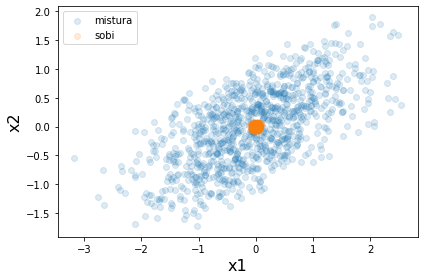

In [ ]:
# Overlay plot
plt.scatter(X[0,:].reshape(-1).tolist(), X[1,:].reshape(-1).tolist(), label='mistura', alpha=0.15)
plt.scatter(S_sobi[0,:].reshape(-1).tolist(), S_sobi[1,:].reshape(-1).tolist(), label='sobi', alpha=0.15)

plt.xlabel('x1', fontsize=16)
plt.ylabel('x2', fontsize=16)
plt.legend()

plt.tight_layout()
plt.savefig('whiten_6.png', dpi=300)

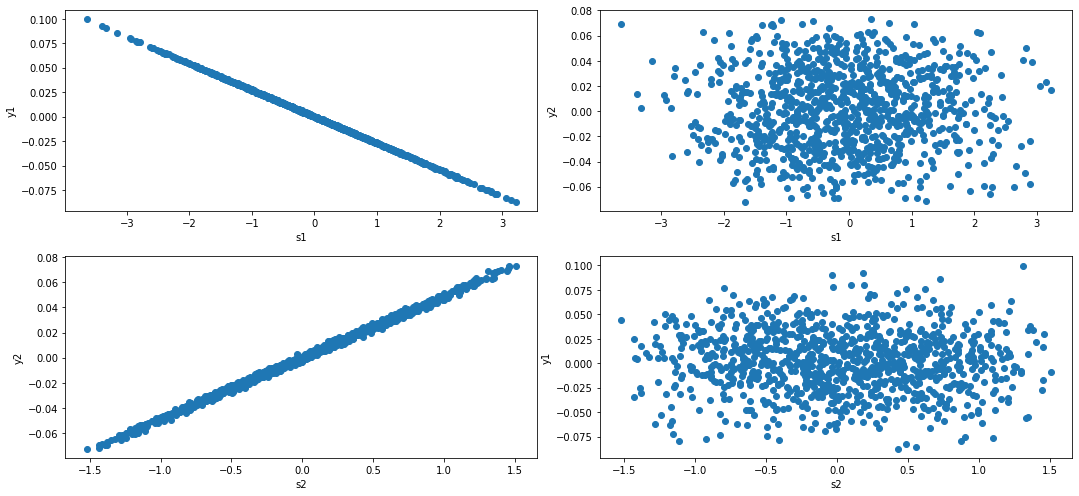

In [ ]:
y1 = S_sobi[0,:].reshape(-1).tolist()
y2 = S_sobi[1,:].reshape(-1).tolist()

fig,ax = plt.subplots(2,2,figsize=(15,7))

ax[0][0].scatter(s1,y1)
ax[0][0].set_xlabel('s1')
ax[0][0].set_ylabel('y1')

ax[1][0].scatter(s2,y2)
ax[1][0].set_xlabel('s2')
ax[1][0].set_ylabel('y2')

ax[1][1].scatter(s2,y1)
ax[1][1].set_xlabel('s2')
ax[1][1].set_ylabel('y1')

ax[0][1].scatter(s1,y2)
ax[0][1].set_xlabel('s1')
ax[0][1].set_ylabel('y2')


plt.tight_layout()
plt.show()

#Comparação entre os 3 métodos


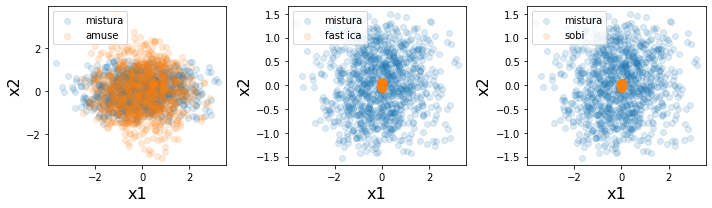

In [ ]:
fig = plt.figure(figsize=(10,3))

plt.subplot(1,3,1)
plt.scatter(s1, s2, label='mistura', alpha=0.15)
plt.scatter(X_RES[0,:].reshape(-1).tolist(), X_RES[1,:].reshape(-1).tolist(), label='amuse', alpha=0.15)
plt.xlabel('x1', fontsize=16)
plt.ylabel('x2', fontsize=16)
plt.legend()

plt.subplot(1,3,2)
plt.scatter(s1, s2, label='mistura', alpha=0.15)
plt.scatter(S_.T[0], S_.T[1], label='fast ica', alpha=0.15)
plt.xlabel('x1', fontsize=16)
plt.ylabel('x2', fontsize=16)
plt.legend()

plt.subplot(1,3,3)
plt.scatter(s1, s2, label='mistura', alpha=0.15)
plt.scatter(S_sobi[0,:].reshape(-1).tolist(), S_sobi[1,:].reshape(-1).tolist(), label='sobi', alpha=0.15)
plt.xlabel('x1', fontsize=16)
plt.ylabel('x2', fontsize=16)
plt.legend()


plt.tight_layout()